# CS 457 - Homework Assignment 3: Exploratory Data Analysis
##Name: Muhammad . , Id: mm06369


Importing pandas, matplotlib, seaborn, and csv file.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan_small.csv')
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [3]:
df['term'] = df['term'].str.replace(' months', '')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [4]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)'], dtype=object)

###Changing values: <br>
Fully Paid = Good <br>
Charged Off = Good <br>
Current = Good <br>
Late = Bad <br>
Default = Bad <br>

In [5]:
df['loan_status'] = df['loan_status'].str.replace('Fully Paid', 'Good').replace('Current', 'Good').replace('Late (31-120 days)', 'Bad').replace('Default', 'Bad').replace('Charged Off', 'Good')
df['loan_status'].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: loan_status, dtype: object

Checking for any other column with missing values

In [6]:
missing_columns = df.columns[df.isna().any()].tolist()
missing_columns

['emp_title',
 'emp_length',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_pymnt_d']

In [7]:
df['emp_length']

0      10+ years
1       < 1 year
2      10+ years
3      10+ years
4         1 year
         ...    
994      5 years
995      3 years
996      2 years
997    10+ years
998    10+ years
Name: emp_length, Length: 999, dtype: object

In [8]:
df['emp_length'] = df['emp_length'].str.replace(r'[\D+<]', '', regex=True)
df['emp_length'] = df['emp_length'].astype(float)
df['emp_length']

0      10.0
1       1.0
2      10.0
3      10.0
4       1.0
       ... 
994     5.0
995     3.0
996     2.0
997    10.0
998    10.0
Name: emp_length, Length: 999, dtype: float64

Replacing the null values in emp_length column using mean of all values.

In [9]:
mean_employee_length = df['emp_length'].mean()
df['emp_length'].fillna(mean_employee_length, inplace = True)


In [10]:
mean_ = df['mths_since_last_delinq'].mean()
median_ = df['mths_since_last_delinq'].median()
mode_ = df['mths_since_last_delinq'].mode()
min = df['mths_since_last_delinq'].min()
max = df['mths_since_last_delinq'].max()
[mean_, median_, mode_, min, max]




[41.11555555555555,
 40.0,
 0    38.0
 Name: mths_since_last_delinq, dtype: float64,
 2.0,
 82.0]

We have alot of missing values so mean, median, and mode do not seem appropriate to fill in the null values. We will fill the null values with random values between min and max of the data.

In [11]:
import random
#did looping so random value was generated each time. replacing it using only fillna one time assigned same random value to each nan value each time.
while(df["mths_since_last_delinq"].isnull().sum()!=0):
    df["mths_since_last_delinq"].fillna(random.randint(min,max),inplace=True,limit=1)

df["mths_since_last_delinq"]

0      36.0
1      18.0
2      25.0
3      35.0
4      38.0
       ... 
994    71.0
995    19.0
996    70.0
997    34.0
998    76.0
Name: mths_since_last_delinq, Length: 999, dtype: float64

Doing same for other months column.

In [12]:
mean_ = df['mths_since_last_record'].mean()
median_ = df['mths_since_last_record'].median()
mode_ = df['mths_since_last_record'].mode()
min = df['mths_since_last_record'].min()
max = df['mths_since_last_record'].max()
[mean_, median_, mode_, min, max]

[87.0,
 91.0,
 0     83.0
 1     91.0
 2    113.0
 Name: mths_since_last_record, dtype: float64,
 33.0,
 118.0]

We have some extreme values in this column also, so we will go for the same approach. We will assign random values.

In [13]:
while(df["mths_since_last_record"].isnull().sum()!=0):
    df["mths_since_last_record"].fillna(random.randint(min,max),inplace=True,limit=1)

df["mths_since_last_record"]

0      113.0
1       82.0
2       74.0
3      108.0
4       52.0
       ...  
994    107.0
995    118.0
996     39.0
997     85.0
998     37.0
Name: mths_since_last_record, Length: 999, dtype: float64

In [14]:
df['emp_title']

0                                   NaN
1                                 Ryder
2                                   NaN
3                   AIR RESOURCES BOARD
4              University Medical Group
                     ...               
994                  Harvard University
995                         Lime Energy
996                      Real Mex Foods
997                     JP Morgan Chase
998    Regional Transportation District
Name: emp_title, Length: 999, dtype: object

Will fill in the nan values with mode because we have categorical data here.

In [15]:
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace = True)
df['emp_title']

0                       Bank of America
1                                 Ryder
2                       Bank of America
3                   AIR RESOURCES BOARD
4              University Medical Group
                     ...               
994                  Harvard University
995                         Lime Energy
996                      Real Mex Foods
997                     JP Morgan Chase
998    Regional Transportation District
Name: emp_title, Length: 999, dtype: object

In [16]:
df['last_pymnt_d']

0      Jan-15
1      Apr-13
2      Jun-14
3      Jan-15
4      Jan-16
        ...  
994    Dec-14
995    Jan-15
996    Sep-12
997    Dec-12
998    Jan-16
Name: last_pymnt_d, Length: 999, dtype: object

Will replace the null values with mode because we don't have any numerical value here.

In [17]:
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace=True)
df['last_pymnt_d']

0      Jan-15
1      Apr-13
2      Jun-14
3      Jan-15
4      Jan-16
        ...  
994    Dec-14
995    Jan-15
996    Sep-12
997    Dec-12
998    Jan-16
Name: last_pymnt_d, Length: 999, dtype: object

In [18]:
missing_columns = df.columns[df.isna().any()].tolist()
missing_columns

[]

In [19]:
df.to_csv("cleaned.csv")

##Part 2


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df1 = pd.read_csv("cleaned.csv")

##Group Analysis Table

Grouping the records based on the grade, and generating a count of its occurrence. This data can help us for mulitple analysis for eg. getting the grade which has most employees, getting the grade which has least employees etc.

In [22]:
df1.groupby('grade')['grade'].count()


grade
A    202
B    354
C    207
D    138
E     72
F     21
G      5
Name: grade, dtype: int64

In [23]:
df1['emp_title'].duplicated()


0      False
1      False
2       True
3      False
4      False
       ...  
994    False
995    False
996    False
997     True
998    False
Name: emp_title, Length: 999, dtype: bool

Grouping the records based on employee title, and its corresponding employee length. This can help us in analyzing the average employee retention rate based on its title.

In [24]:
df1.groupby('emp_title')['emp_length'].mean()

emp_title
16th MP BDE, U.S. Army     10.0
3 mile harbor boatyard      2.0
6th Avenue Outfitters       4.0
90 miles cuban cafe         1.0
A Touch Of Italy            8.0
                           ... 
webb candy                  1.0
wells fargo                 3.0
wolverton Inc.             10.0
wrisco                      1.0
wyoming valley hospital     1.0
Name: emp_length, Length: 918, dtype: float64

Grouping the records based on term, and its corresponding loan amount. Getting the mean to help us analyze which term has the highest or lowest loan amount.


In [25]:
df1.groupby("term")["loan_amnt"].mean()


term
36    10783.206897
60    17787.682482
Name: loan_amnt, dtype: float64

Grouping the records on purpose, and finding the corresponding annual income. This can help us analyze the that what purposes of the loan align with the person's income. For eg the person taking loan for house has higher income than the person taking it for car.

In [26]:
df1.groupby("purpose")["annual_inc"].mean()

purpose
car                   53140.909091
credit_card           61722.998690
debt_consolidation    61587.341385
home_improvement      76984.648649
house                 80714.285714
major_purchase        71590.157895
medical               55926.636364
moving                46651.200000
other                 58120.396190
renewable_energy      42000.000000
small_business        66042.514286
vacation              70118.000000
wedding               53850.000000
Name: annual_inc, dtype: float64

Grouping the record by purpose, and finding aggregate of mean, min, and max of the corresponding loan amount. This will help us identify how much loan can people take for a particular purpose.

In [27]:
df1.groupby(['purpose']).agg({'loan_amnt': ['mean', 'min', 'max']})

loan_amnt             
                            mean   min    max
purpose                                      
car                  7107.954545  2500  24000
credit_card         12838.988095  2000  35000
debt_consolidation  13848.339658  1000  35000
home_improvement    14741.891892  1700  35000
house               11857.142857  4000  26400
major_purchase       6442.105263  1000  18500
medical              6250.000000  2400  12000
moving               7180.000000  2000  10800
other                7787.698413  1400  27575
renewable_energy     3000.000000  3000   3000
small_business      13007.142857  1000  35000
vacation             7115.000000  1200  25000
wedding             12625.000000  5000  35000

##Univariate Analysis

<Axes: xlabel='grade'>

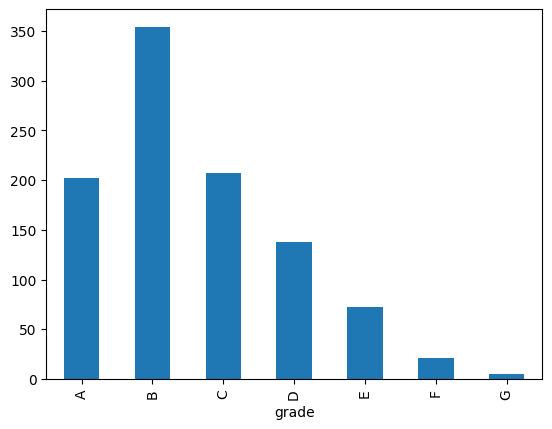

In [28]:
df1.groupby('grade')['grade'].count().plot(kind='bar')

<Axes: xlabel='purpose'>

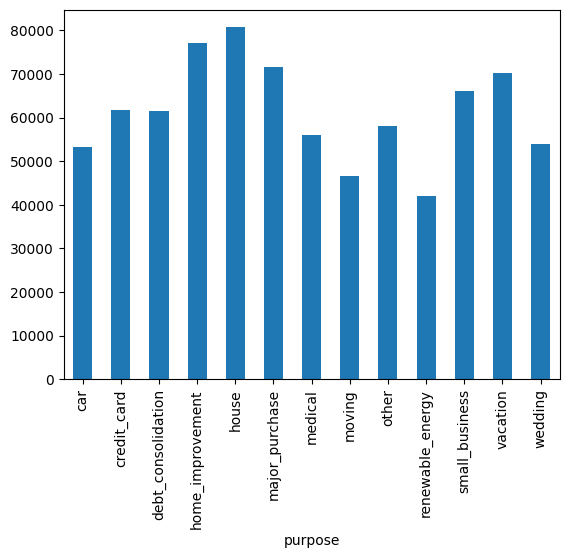

In [29]:
df1.groupby("purpose")["annual_inc"].mean().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

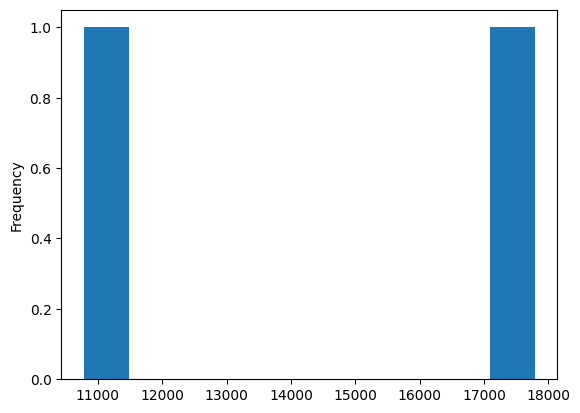

In [30]:
df1.groupby("term")["loan_amnt"].mean().plot(kind = 'hist')

##Bivariate Analysis

Drawing scatter plot of annual income against the purpose of the loan which can help us visualize the purpose of people taking loan with particular annual income. Like we can see people taking loan for medical have their annual salary between 10000 to 100000.

<Axes: xlabel='annual_inc', ylabel='purpose'>

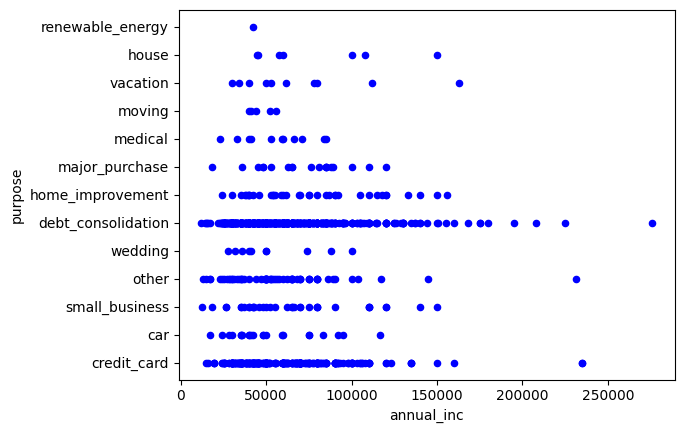

In [31]:
df1.plot.scatter(x='annual_inc', y='purpose', c='blue')


The data shows linear relationship because as the loan amount increases, the installment amount also increases with it.

<Axes: xlabel='installment', ylabel='loan_amnt'>

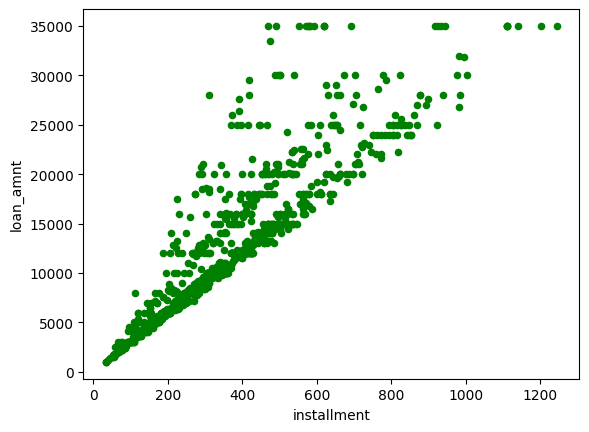

In [32]:
df1.plot.scatter(x='installment', y='loan_amnt', c='green')

In [33]:
corr = df1[['loan_amnt', 'int_rate', 'installment', 'annual_inc']].corr()

Correlation plot for loan amount, interest rate, installment and annual income for the employee. This plot can help us identify the patterns of employees taking the loan and see trends such as the total loan amount, and the annual income of the employee. It can help us see cases like a employee taking higher amount of loan with high annual income, and pay higher installment with lower interest rate.

<Axes: >

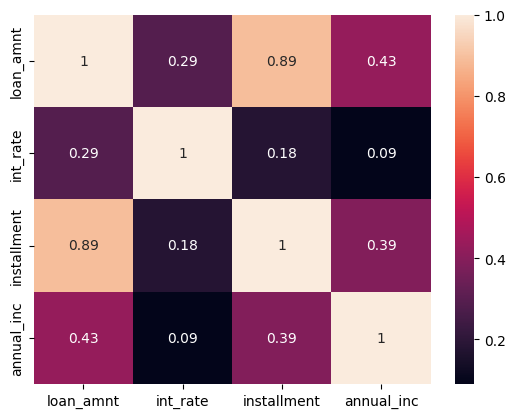

In [34]:
sns.heatmap(round(corr,2),annot=True)